In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
x = 6*np.random.rand(200,1)-3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200, 1)


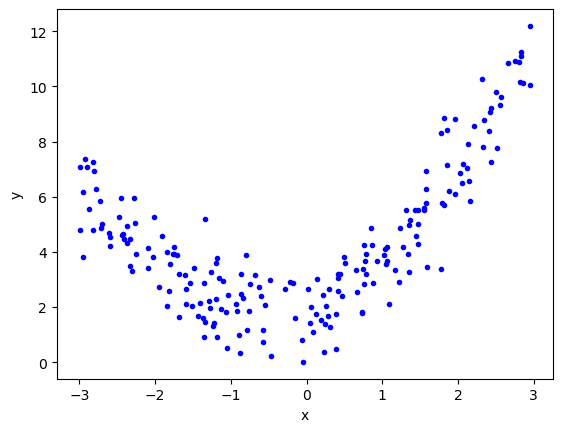

In [8]:
plt.plot(x,y,'b. ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [9]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

# using simple linear regression

In [10]:
# Applying linear regression
lr = LinearRegression()

In [11]:
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.022720159799695105

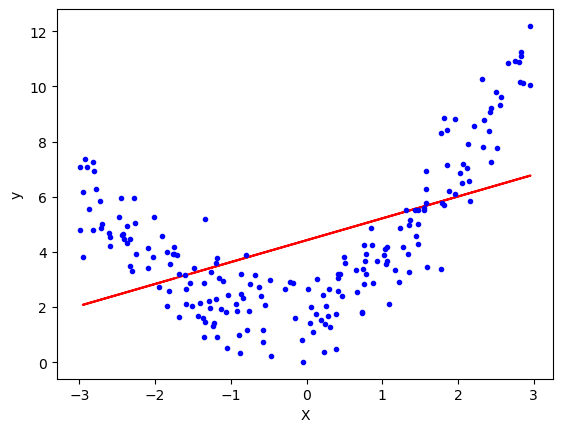

In [14]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# using polynomial regression

In [15]:
poly = PolynomialFeatures(degree=2)

x_train_new = poly.fit_transform(x_train)
x_test_new = poly.transform(x_test)

In [19]:
print(x_train[0])
print(x_train_new[0])

[-1.51063412]
[ 1.         -1.51063412  2.28201546]


In [20]:
lr = LinearRegression()

In [22]:
lr.fit(x_train_new,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(x_test_new)
r2_score(y_test,y_pred)

0.7625269675563213

In [24]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.85104939 0.79055269]]
[2.11982349]


In [27]:
x_new=np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

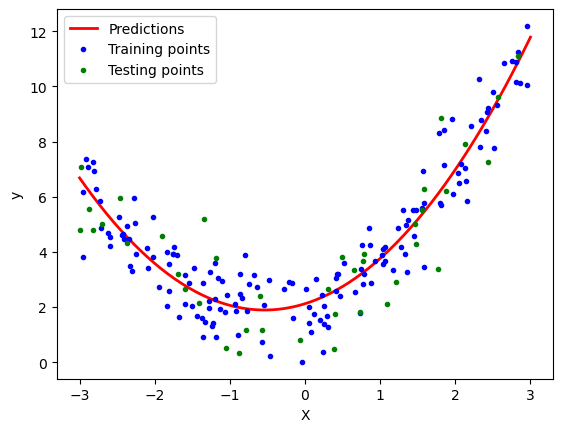

In [28]:
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()